# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
data = pd.read_csv("Dataset_clustering.csv")
data.head()

,Customer_ID,Recency,Frequency,Monetary,Count_Discount,Avg_Discount,AOV,Cluster,Top_Category
0,CUS1,1.0,305.0,38904.13,0.0,0.000000,127.554525,1,Soft Drinks
1,CUS10,2.0,296.0,40288.83,0.0,0.000000,136.110912,1,Water
2,CUS100,3.0,287.0,36039.74,0.0,0.000000,125.574007,1,Soft Drinks
3,CUS1000,1.0,289.0,271186.90,881.0,99.625474,938.362976,2,Soft Drinks
4,CUS10000,7.0,299.0,253436.72,929.0,92.616119,847.614448,2,Juices


Cluster distribution: Counter({1: 4770, 2: 2621, 0: 1667, 3: 942})


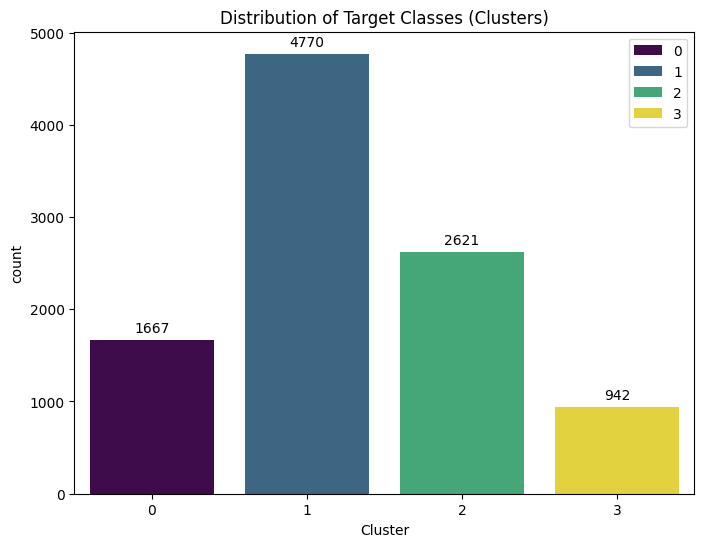

In [18]:
print(f"Cluster distribution: {Counter(data['Cluster'])}")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Cluster", data=data, hue="Cluster", palette="viridis")
plt.title("Distribution of Target Classes (Clusters)")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)
plt.legend(loc="best")
plt.show()

In [19]:
X = data.drop(columns=["Cluster", "Customer_ID"])
y = data["Cluster"]
print(X.shape, y.shape)

(10000, 7) (10000,)


In [20]:
X_encoding = pd.get_dummies(X, columns=["Top_Category"])
X_encoding.head()

,Recency,Frequency,Monetary,Count_Discount,Avg_Discount,AOV,Top_Category_Alcoholic Beverages,Top_Category_Juices,Top_Category_Soft Drinks,Top_Category_Water
0,1.0,305.0,38904.13,0.0,0.000000,127.554525,False,False,True,False
1,2.0,296.0,40288.83,0.0,0.000000,136.110912,False,False,False,True
2,3.0,287.0,36039.74,0.0,0.000000,125.574007,False,False,True,False
3,1.0,289.0,271186.90,881.0,99.625474,938.362976,False,False,True,False
4,7.0,299.0,253436.72,929.0,92.616119,847.614448,False,True,False,False


In [51]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_encoding, y)
print(f"Resampled dataset shape: {Counter(y_resampled)}")

X_resampled = pd.DataFrame(X_resampled, columns=X_encoding.columns)
y_resampled = pd.Series(y_resampled, name="Cluster")

Resampled dataset shape: Counter({1: 4770, 2: 4770, 0: 4770, 3: 4770})


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.02, random_state=42, stratify=y_resampled)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

print(f"Label Distribution (Train): {Counter(y_train)}")
print(f"Label Distribution (Test): {Counter(y_test)}")

Training set shape: (18698, 10), (18698,)
Test set shape: (382, 10), (382,)
Label Distribution (Train): Counter({1: 4675, 3: 4675, 0: 4674, 2: 4674})
Label Distribution (Test): Counter({2: 96, 0: 96, 1: 95, 3: 95})


In [69]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test, columns=X_test.columns)

print("Train: ", X_train_scaled.shape)
print("Test: ", X_test_scaled.shape)

Train:  (18698, 10)
Test:  (382, 10)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [81]:
knn_model = KNeighborsClassifier().fit(X_train_scaled, y_train)
dt_model = DecisionTreeClassifier().fit(X_train_scaled, y_train)

y_pred_train_knn = knn_model.predict(X_train_scaled)
y_pred_train_dt = dt_model.predict(X_train_scaled)

print(f"Accuracy Score KNN Model (Train): {accuracy_score(y_train, y_pred_train_knn)}")
print(f"Accuracy Score RF Model (Train): {accuracy_score(y_train, y_pred_train_dt)}")

Accuracy Score KNN Model (Train): 0.8299283345812386
Accuracy Score RF Model (Train): 1.0


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

KNN Model: 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67        96
           1       0.67      0.58      0.62        95
           2       0.80      0.68      0.73        96
           3       0.72      0.83      0.77        95

    accuracy                           0.70       382
   macro avg       0.71      0.70      0.70       382
weighted avg       0.71      0.70      0.70       382

Accuracy Score KNN Model: 0.7015706806282722
F1 Score KNN Model: 0.6999788613557446


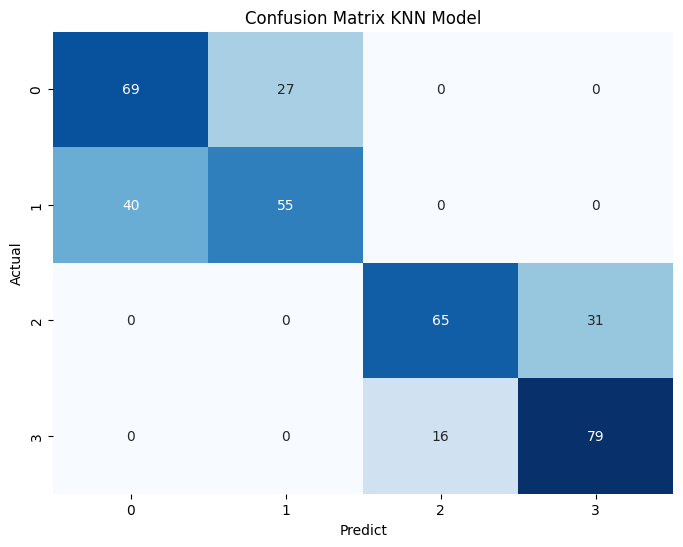

In [82]:
y_pred_knn = knn_model.predict(X_test_scaled)

print(f"KNN Model: \n {classification_report(y_test, y_pred_knn)}")
print(f"Accuracy Score KNN Model: {accuracy_score(y_test, y_pred_knn)}")
print(f"F1 Score KNN Model: {f1_score(y_test, y_pred_knn, average='weighted')}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Model")
plt.show()

DT Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        95

    accuracy                           1.00       382
   macro avg       1.00      1.00      1.00       382
weighted avg       1.00      1.00      1.00       382

Accuracy Score DT Model: 1.0
F1 Score DT Model: 1.0


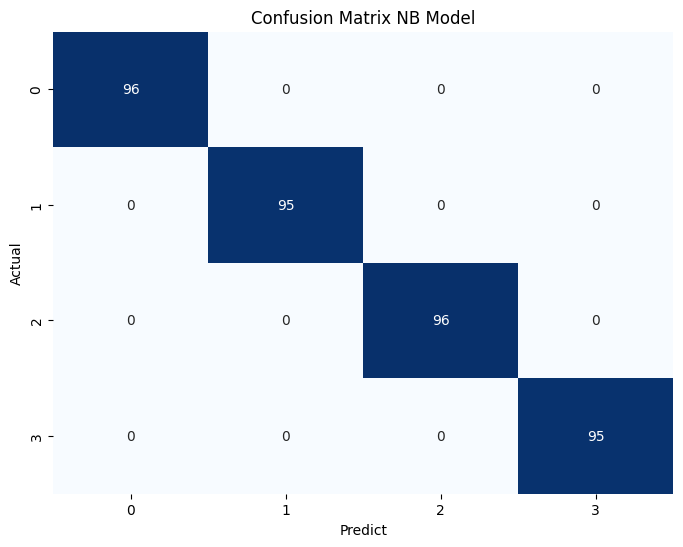

In [83]:
y_pred_dt = dt_model.predict(X_test_scaled)

print(f"DT Model: \n {classification_report(y_test, y_pred_dt)}")
print(f"Accuracy Score DT Model: {accuracy_score(y_test, y_pred_dt)}")
print(f"F1 Score DT Model: {f1_score(y_test, y_pred_dt, average='weighted')}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Model")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [84]:
param_grid = {
    "n_neighbors": [5, 7, 9, 11, 13],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_param = grid_search.best_estimator_

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

KNN Model (Tuning): 
               precision    recall  f1-score   support

           0       0.72      0.86      0.79        96
           1       0.83      0.66      0.74        95
           2       0.86      0.78      0.82        96
           3       0.80      0.87      0.83        95

    accuracy                           0.80       382
   macro avg       0.80      0.80      0.79       382
weighted avg       0.80      0.80      0.79       382

Accuracy Score KNN Model (Tuning): 0.7958115183246073
F1 Score KNN Model (Tuning): 0.7944000578446432


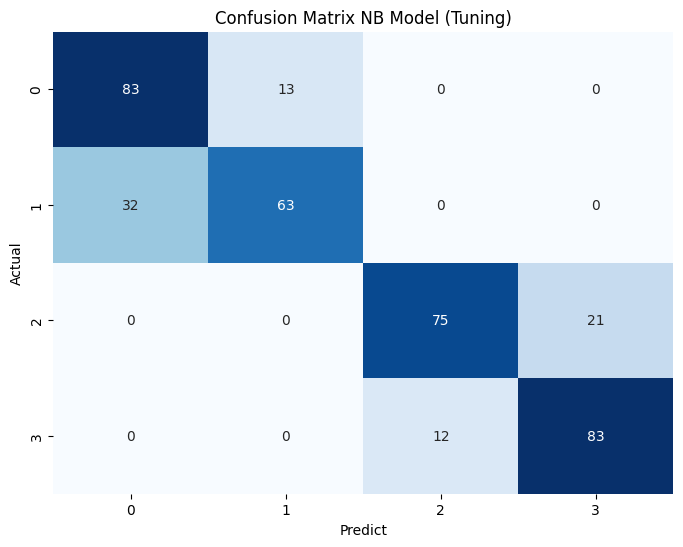

In [85]:
y_pred_tuning = grid_search.predict(X_test_scaled)

print(f"KNN Model (Tuning): \n {classification_report(y_test, y_pred_tuning)}")
print(f"Accuracy Score KNN Model (Tuning): {accuracy_score(y_test, y_pred_tuning)}")
print(f"F1 Score KNN Model (Tuning): {f1_score(y_test, y_pred_tuning, average='weighted')}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_tuning)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Model (Tuning)")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Setelah dilakukan tuning pada hyperparameter menggunakan metode Grid Search, terjadi peningkatan akurasi dari 70.15% menjadi 79.58% yang menunjukan adanya perbaikan performa secara keseluruhan. Namun, berdasarkan confusion matrix kelas 1 memiliki nilai recall paling rendah, yaitu 0.66, meskipun precission-nya tergolong tinggi (0.83).

Meskipun tidak terdapat indikasi kuat terjadinya overfitting, nilai F1-Score yang sedikit lebih rendah pada kelas tertentu dapat menunjukan bahwa model masih bisa ditingkatkan, terutama dalam hal generalisasi pada kelas yang kurang seimbang. Rekomendasi tindakan lanjutan yang dapat dilakukan adalah memperbanyak dataset terutama untuk kelas yang tidak seimbang